<a href="https://colab.research.google.com/github/XY-1/test/blob/master/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [200]:
from google.colab import files
uploaded = files.upload()

Saving result_all to result_all (1)


In [0]:
from IPython.display import display

In [202]:
%%time
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['result_all'].decode('utf-8')), sep="\t")
print(data['en'][0])

 [SEP] laminated structure [SEP] laminate film [SEP] pressure bonding [SEP] edible layers [SEP] method
CPU times: user 240 ms, sys: 39 ms, total: 279 ms
Wall time: 282 ms


In [0]:
new_df=data.apply(lambda x: str(x['en']).count('[SEP]') ,axis=1)

In [205]:
display(new_df.describe())

count    100000.000000
mean          3.647960
std           2.448581
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          28.000000
dtype: float64

0      4211
1     11833
2     20546
3     19210
4     15155
5     10905
6      6507
7      4381
8      2808
9      1891
10     1060
11      588
12      275
13      228
14      123
15       80
16       86
17       28
18       23
19       13
20       15
21        4
22       10
25        9
28       11
dtype: int64


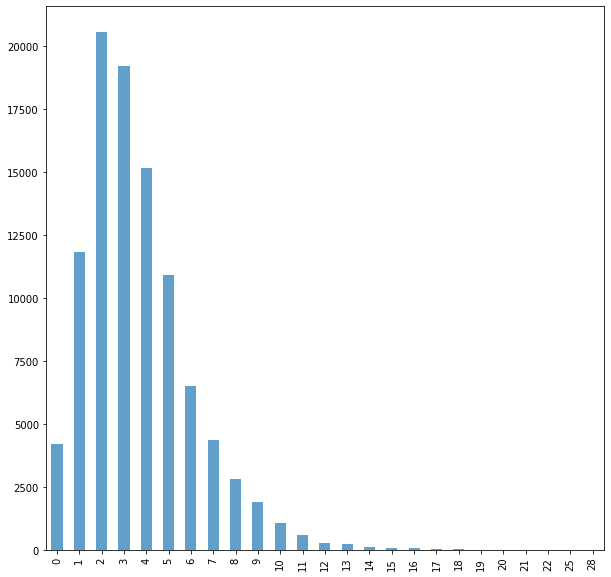

In [209]:
dfg=new_df.value_counts().sort_index(0)
print(dfg.T)
dfg.plot(kind='bar',  alpha=0.7)
plt.show()

In [210]:
buf=str(data['en'][0]).split(' [SEP] ')
buf[1:]

['laminated structure',
 'laminate film',
 'pressure bonding',
 'edible layers',
 'method']

In [0]:
%%time
from collections import defaultdict
d = defaultdict(set)
for index, row in data.iterrows():
  ebuf=str(row['en']).split(' [SEP] ')
  e=ebuf[1:]
  jbuf=str(row['ja']).split(' [SEP] ')
  j=jbuf[1:]
  for i, ee in enumerate(e):
    d[ee].add(j[i])

In [0]:
dc=defaultdict(int)
for di in d.keys():
  dc[di]=len(d[di])

In [213]:
len(d)

8943

In [214]:
df_dict = pd.DataFrame(dc.values(), index=dc.keys())
df_dict.columns = ['feature']
df_dict2 = pd.DataFrame(d.values(), index=d.keys())
df_show=pd.concat([df_dict,df_dict2],axis=1)
df_show[df_show['feature']>4]

,feature,0,1,2,3,4,5,6,7
operation,8,操作,運転,動作,作用,演算,実施,作動,作業
product,5,製品,商品,積,産物,生成物,None,None,None
base,5,基材,ベース,基剤,基礎,基板,None,None,None
device,5,デバイス,装置,機器,具,素子,None,None,None
cutting blade,5,切断刃,刈刃,切断用ブレード,刈り刃,切刃,None,None,None
protein,5,タンパク,タンパク質,たんぱく質,蛋白質,プロテイン,None,None,None
variation,6,変動,変化,変形例,バラツキ,ばらつき,変異,None,None
suspension,5,懸濁液,浮遊,吊り下げ,懸濁,懸濁物,None,None,None
periphery,5,周囲,周辺部,周辺,周縁,外周,None,None,None
preparation,8,製造,処理,調製,生成,準備,調整,調製物,標品


1    7874
2     826
3     165
4      54
5      15
6       4
7       3
8       2
Name: feature, dtype: int64


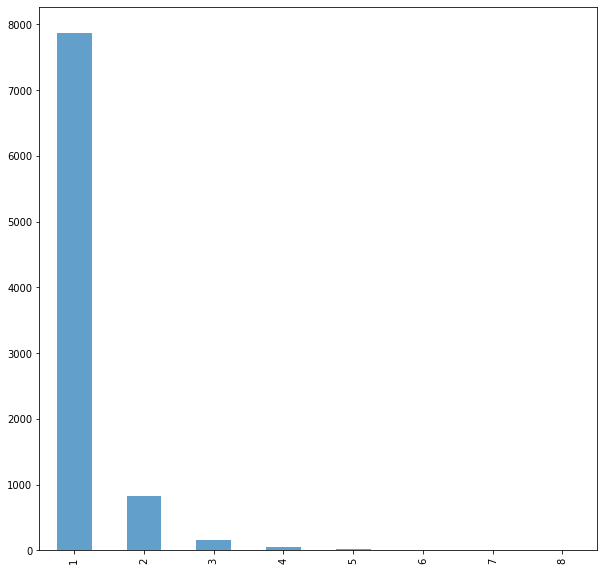

In [215]:
df_dict_g=df_dict['feature'].value_counts().sort_index(0)
print(df_dict_g)
df_dict_g.plot(kind='bar',  alpha=0.7)
plt.show()

In [216]:
dd=df_dict.to_dict(orient='index')
dd

{'laminated structure': {'feature': 1},
 'laminate film': {'feature': 1},
 'pressure bonding': {'feature': 1},
 'edible layers': {'feature': 1},
 'method': {'feature': 4},
 'embodiment': {'feature': 3},
 'slitter': {'feature': 1},
 'apparatus': {'feature': 3},
 'smooth surface': {'feature': 1},
 'edible layer': {'feature': 1},
 'solution': {'feature': 4},
 'glycyrrhizinic acid': {'feature': 1},
 'peppermint oil': {'feature': 1},
 'organic acid': {'feature': 1},
 'tartaric acid': {'feature': 2},
 'sweeteners': {'feature': 2},
 'fructose': {'feature': 3},
 'mannitol': {'feature': 1},
 'citrate': {'feature': 1},
 'press rolls': {'feature': 1},
 'operation': {'feature': 8},
 'conveying direction': {'feature': 1},
 'resin film': {'feature': 1},
 'upper surface': {'feature': 1},
 'film winding': {'feature': 1},
 'delamination': {'feature': 1},
 'shaft': {'feature': 3},
 'height difference': {'feature': 1},
 'irregularities': {'feature': 1},
 'coating method': {'feature': 1},
 'coating amount

In [0]:
import statistics
def make_dataframe_counter(data, dd):
  counter=0
  data['max']=0
  data['min']=0
  data['med']=0.
  for index, row in data.iterrows():
    ebuf=str(row['en']).split(' [SEP] ')
    e=ebuf[1:]
    if(len(e)>0):
      buf=set()
      for ee in e:
        buf.add(dd[ee]['feature'])
      data['max'][index]=max(buf)
      data['min'][index]=min(buf)
      data['med'][index]=statistics.median(buf)

In [233]:
%%time
make_dataframe_counter(data,dd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


CPU times: user 36.3 s, sys: 16.3 ms, total: 36.3 s
Wall time: 36.3 s


0     4211
1    85674
2     7312
3     1759
4      895
5       91
6        1
7       29
8       28
Name: min, dtype: int64


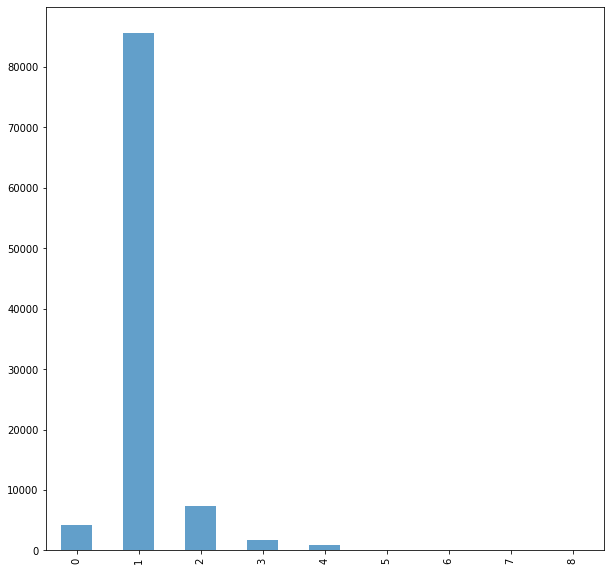

In [234]:
dfg=new_data['min'].value_counts().sort_index(0)
print(dfg)
dfg.plot(kind='bar',  alpha=0.7)
plt.show()

0     4211
1    26651
2    29954
3    18324
4    14566
5     3497
6      597
7      864
8     1336
Name: max, dtype: int64


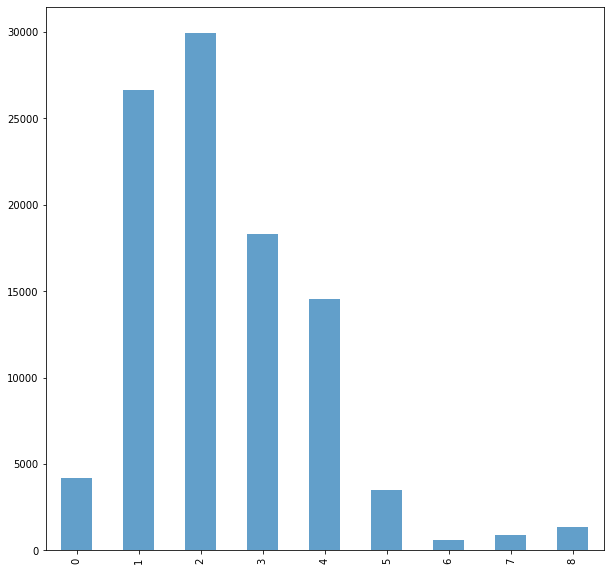

In [235]:
dfg=new_data['max'].value_counts().sort_index(0)
print(dfg)
dfg.plot(kind='bar',  alpha=0.7)
plt.show()

0.0     4211
1.0    26651
1.5    25703
2.0    26456
2.5     7676
3.0     6259
3.5      780
4.0     1455
4.5      416
5.0      285
5.5       50
6.0        1
7.0       29
8.0       28
Name: med, dtype: int64


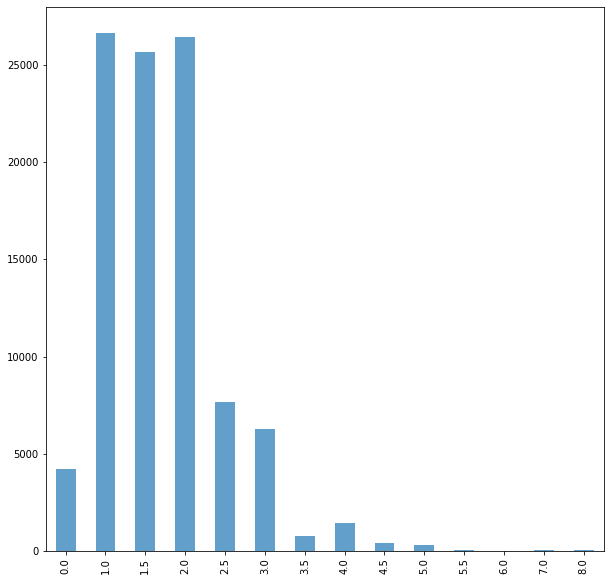

In [237]:
# データ数が偶数の場合は、中央値は中央に最も近い2値の算術平均で補間されます
dfg=new_data['med'].value_counts().sort_index(0)
print(dfg)
dfg.plot(kind='bar',  alpha=0.7)
plt.show()